In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# PCA CAPACIDADES

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (CAPACIDADES) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios
5. PCA

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [4]:
#Se cargan el archivo limpios sin variables respetidas, imputados los datos y sin atípicos

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas

In [5]:
variables = ['TRANSP_PT','MUESTRASGRATIS_PROD','MUESTRASGRATIS_ADM','TOT_MUESTRASGRATIS','PUBLICIDAD_PROD','PUBLICIDAD_ADM','TOT_PUBLICIDAD',
            'COSTOS_PT_ELAB_TERCEROS','OUTSOURCING_PROD','OUTSOURCING_ADM','TOTAL_OUTSOURCING','COMPRAS_MP_EXTERIOR','USO_PATENTES_ADM',
            'TOTALUSO_PATENTES','GASTOSCARTERA','GASTOSEDIF_USOPROPIO','GASTOSMAQ_USOPROPIO','GASTOSEINFORMATICA_USOPROPIO','VENTAS',
            'GASTOSEOFICINA_USOPROPIO','GASTOSEQTRANSP_USOPROPIO','TOTALGASTOS_USOPROPIO','COMPRAEINFORMATICA_NUEVO','COMPRAEINFORMATICA_USADO',
            'TOTALINV_EINFORMATICA','VAL_VENDIDOS_EINFORMATICA','VAL_EINFORMATICA']
# Separando los Recursos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 
x_std= StandardScaler().fit_transform(X)

In [6]:
capacidades = pd.DataFrame(data = X, columns = variables).head(10295)
capacidades

,TRANSP_PT,MUESTRASGRATIS_PROD,MUESTRASGRATIS_ADM,TOT_MUESTRASGRATIS,PUBLICIDAD_PROD,PUBLICIDAD_ADM,TOT_PUBLICIDAD,COSTOS_PT_ELAB_TERCEROS,OUTSOURCING_PROD,OUTSOURCING_ADM,...,GASTOSEINFORMATICA_USOPROPIO,VENTAS,GASTOSEOFICINA_USOPROPIO,GASTOSEQTRANSP_USOPROPIO,TOTALGASTOS_USOPROPIO,COMPRAEINFORMATICA_NUEVO,COMPRAEINFORMATICA_USADO,TOTALINV_EINFORMATICA,VAL_VENDIDOS_EINFORMATICA,VAL_EINFORMATICA
0,1750.000000,15326.602761,58465.24938,47359.806799,22549.880305,2650.000000,2650.000000,1.789890e+05,173670.355833,165701.494784,...,79752.8,3460300.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,35800.0
1,41146.000000,15326.602761,58465.24938,47359.806799,22549.880305,147386.056609,142261.896647,1.158180e+06,173670.355833,165701.494784,...,79752.8,296411.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,5522.0
2,19617.000000,15326.602761,58465.24938,47359.806799,22549.880305,7308.000000,7308.000000,2.726740e+05,4464.000000,165701.494784,...,79752.8,1597520.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,6219.0
3,145052.944147,15326.602761,58465.24938,47359.806799,22549.880305,7032.000000,7032.000000,1.158180e+06,173670.355833,165701.494784,...,79752.8,231480.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,145052.944147,15326.602761,58465.24938,47359.806799,22549.880305,10038.000000,10038.000000,1.158180e+06,173670.355833,165701.494784,...,79752.8,1100444.0,28164.0,18730.4,299923.373626,27453.986363,11182.00000,11182.000000,40864.050388,18399.0
10292,28055.000000,15326.602761,58465.24938,47359.806799,22549.880305,147386.056609,142261.896647,1.158180e+06,173670.355833,165701.494784,...,79752.8,3300208.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,4939.0
10293,46992.000000,15326.602761,58465.24938,47359.806799,22549.880305,27168.000000,27168.000000,6.470340e+05,173670.355833,165701.494784,...,79752.8,15443532.0,28164.0,18730.4,299923.373626,21831.000000,23951.89313,21831.000000,40864.050388,210944.0
10294,145052.944147,15326.602761,58465.24938,47359.806799,22549.880305,23878.000000,23878.000000,1.158180e+06,173670.355833,165701.494784,...,79752.8,1180126.0,28164.0,18730.4,299923.373626,27453.986363,23951.89313,27708.860206,40864.050388,43567.0


In [7]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

capacidades.isnull().sum() # Saber si hay casos con NA
capacidades.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
capacidades.columns

Index(['TRANSP_PT', 'MUESTRASGRATIS_PROD', 'MUESTRASGRATIS_ADM',
       'TOT_MUESTRASGRATIS', 'PUBLICIDAD_PROD', 'PUBLICIDAD_ADM',
       'TOT_PUBLICIDAD', 'COSTOS_PT_ELAB_TERCEROS', 'OUTSOURCING_PROD',
       'OUTSOURCING_ADM', 'TOTAL_OUTSOURCING', 'COMPRAS_MP_EXTERIOR',
       'USO_PATENTES_ADM', 'TOTALUSO_PATENTES', 'GASTOSCARTERA',
       'GASTOSEDIF_USOPROPIO', 'GASTOSMAQ_USOPROPIO',
       'GASTOSEINFORMATICA_USOPROPIO', 'VENTAS', 'GASTOSEOFICINA_USOPROPIO',
       'GASTOSEQTRANSP_USOPROPIO', 'TOTALGASTOS_USOPROPIO',
       'COMPRAEINFORMATICA_NUEVO', 'COMPRAEINFORMATICA_USADO',
       'TOTALINV_EINFORMATICA', 'VAL_VENDIDOS_EINFORMATICA',
       'VAL_EINFORMATICA'],
      dtype='object')

In [8]:
#Se elimina la variable ventas pues X=VARIABLES INDEPENDIENTES=Recursos
x=capacidades.drop("VENTAS",axis = 1)

y=capacidades["VENTAS"]  #Y=VARIABLE DEPENDIENTE= Ventas
names=capacidades.columns
X_std= StandardScaler().fit_transform(x) #Normalizando

<Figure size 432x288 with 0 Axes>

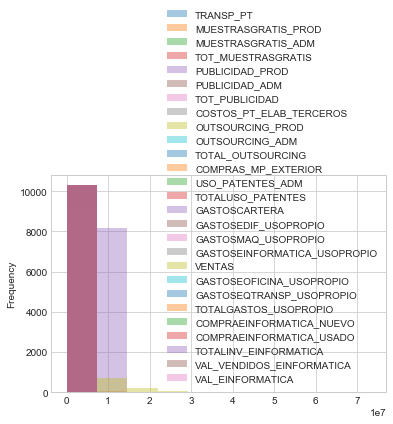

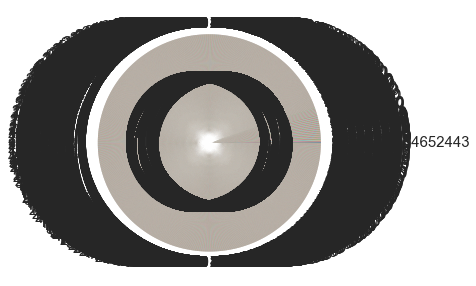

In [8]:
plt.figure("Histograma")
capacidades.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
capacidades.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto.

In [9]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

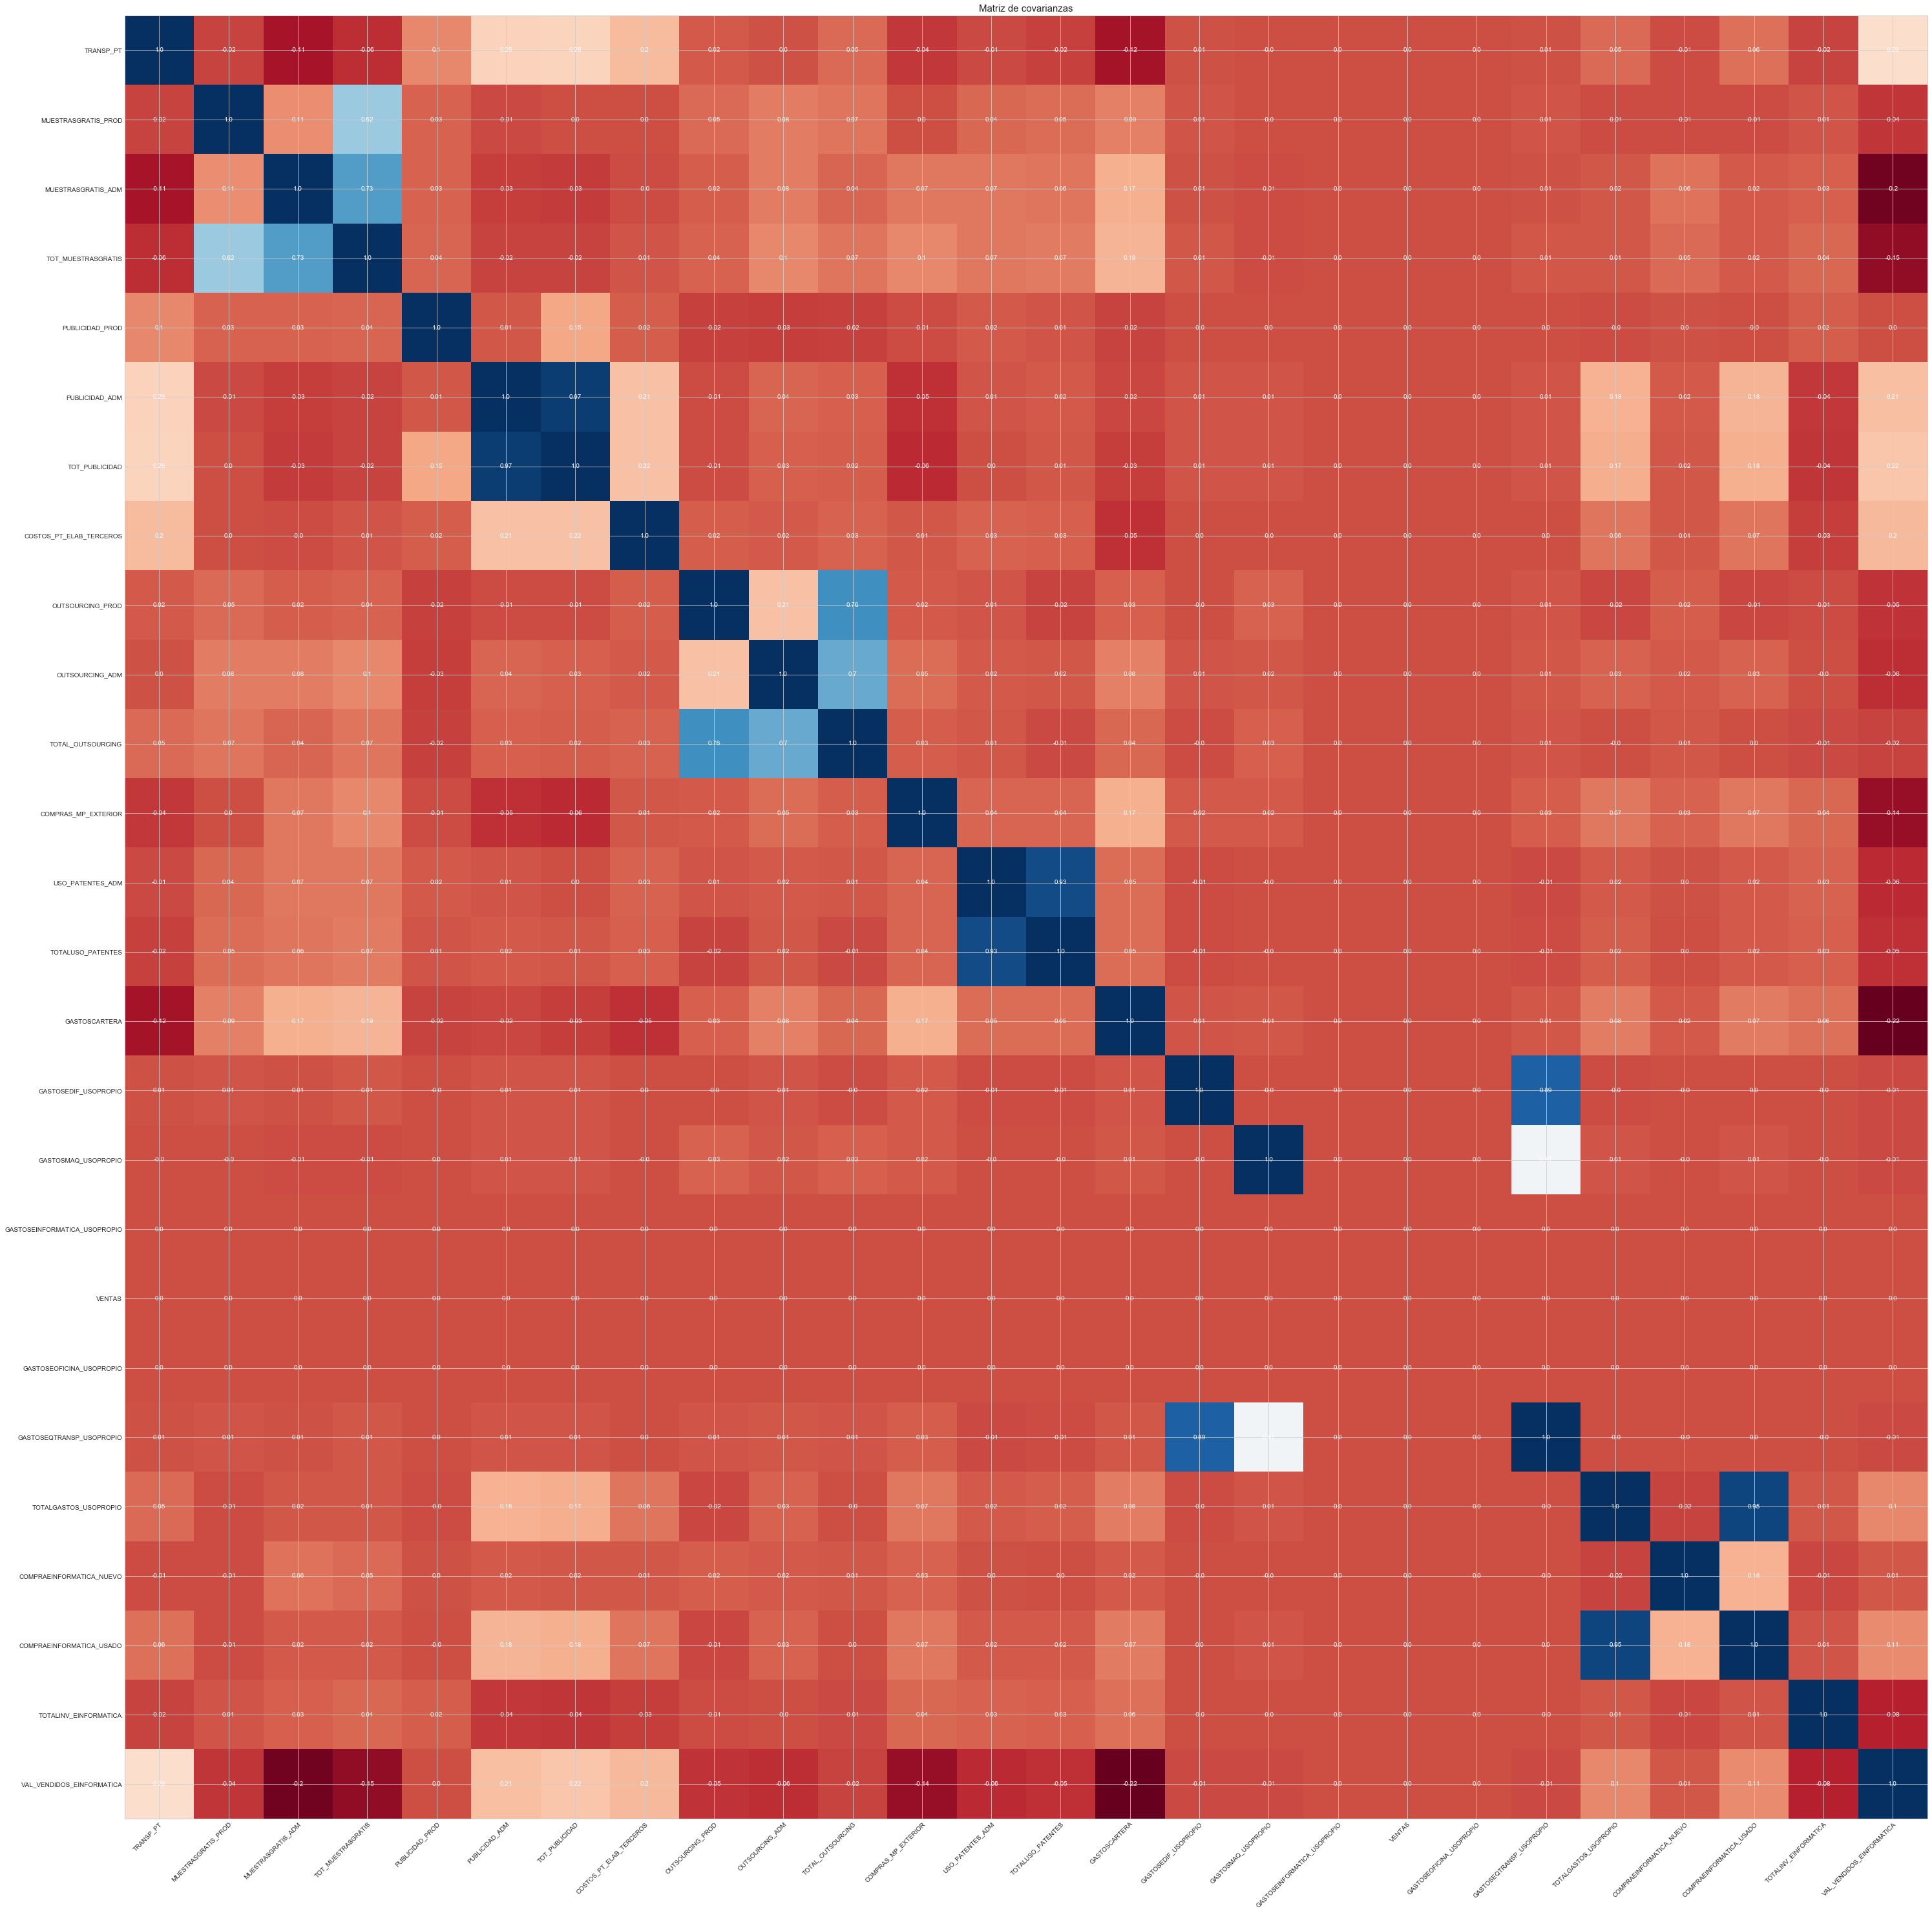

In [10]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(50,100))
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:27])
ax.set_yticklabels(names[:27])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

4.Cálculo de los valores propios

In [11]:
eigen_value, eigen_vector =np.linalg.eig(corMat) 
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

Valores propios 
  [2.63854185 2.42957639 2.06761626 1.9729777  1.82602187 1.70885715
 0.09395674 0.06319469 0.06539434 0.02074675 0.03058192 0.02533415
 1.19305409 0.65377515 0.76439192 0.77992626 0.78484924 0.86983402
 0.94840067 1.04001877 1.03136236 0.99506513 0.99875688 0.
 0.         0.        ] 

Vectores propios 
 [[ 2.85560188e-01 -3.07545763e-03  7.45856891e-02  1.64256034e-02
   1.10671212e-01 -1.58241398e-01  2.76365866e-02 -1.68672632e-02
  -7.87551048e-03 -8.06877790e-03 -7.59203214e-03 -1.26243553e-03
  -2.08031543e-01 -4.90225581e-01  5.66636181e-01  1.99623607e-01
   2.33260249e-01 -8.61834598e-02  2.74907481e-02  3.73156730e-01
  -4.60814510e-02 -1.54796192e-01  4.05045795e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.13102392e-01 -2.76341416e-01 -8.44904154e-02 -1.13764483e-02
  -1.14973356e-01 -3.01081977e-01  4.23458280e-01  6.95043963e-02
  -4.39437743e-02 -7.59985408e-04  5.06539529e-04 -2.15839186e-03
  -3.28821434e-01 -1.02911194e-01 -1.88734299e-

In [12]:
var=[(eigen_value[i]/26)*100 for i in range(len(eigen_value))]
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum


[10.148237898174347,
 19.492762464639537,
 27.445132682974773,
 35.03350846619216,
 42.05666952278629,
 48.62919702806966,
 48.99056910479885,
 49.23362560991447,
 49.48514231740079,
 49.564937507205784,
 49.68256027751543,
 49.779999314373434,
 54.368668900905206,
 56.88318869209953,
 59.823157628003024,
 62.82287399807771,
 65.84152492764679,
 69.18704040120312,
 72.83473529520809,
 76.834807472055,
 80.80158577499253,
 84.62875934458624,
 88.47013196634335,
 88.47013196634335,
 88.47013196634335,
 88.47013196634335]

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

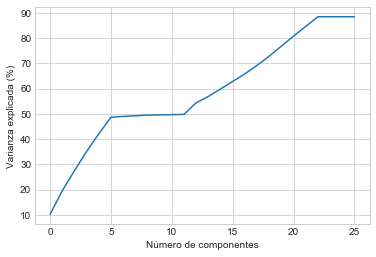

In [13]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

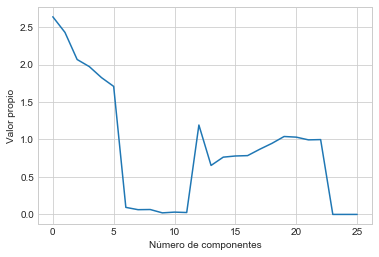

In [14]:
plt.plot(eigen_value,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Valor propio")
plt.show()

Se toman las primeras doce componentes cuya varianza explicada es del 49.7% REVISAR..

In [15]:
M_w=eigen_vector[:,0:12]
Y=X_std.dot(M_w) # Nuevos Y

5.PCA

In [16]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=12)
Y_1=sklearn_PCA.fit_transform(X_std)

In [17]:
PCAcapacidades = pd.DataFrame(data = Y_1, columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3', 'Componente principal 4','Componente principal 5', 'Componente principal 6','Componente principal 7', 'Componente principal 8','Componente principal 9', 'Componente principal 10','Componente principal 11', 'Componente principal 12'])
PCAcapacidades.head(10295)

,Componente principal 1,Componente principal 2,Componente principal 3,Componente principal 4,Componente principal 5,Componente principal 6,Componente principal 7,Componente principal 8,Componente principal 9,Componente principal 10,Componente principal 11,Componente principal 12
0,-1.038756,0.656142,-0.248705,0.029411,-0.571569,-1.052515,0.067378,-0.023221,-0.156958,-0.041274,0.317096,0.183137
1,0.520018,1.156616,-0.262832,0.017218,-0.251862,-0.122593,-0.665427,-0.077222,0.035260,0.035284,-0.026129,0.052235
2,-0.799232,-1.031913,-2.797674,0.724066,-1.209906,-0.361450,-0.211590,-0.078342,-0.055734,-0.005403,-0.017873,0.204588
3,-0.421555,0.786890,-0.147996,-0.003296,-0.325169,-0.661059,0.392768,0.780785,0.177945,0.094876,-0.376919,0.215251
...,...,...,...,...,...,...,...,...,...,...,...,...
10291,-0.868809,0.166166,0.218167,-0.029991,0.439677,0.170224,-0.010776,0.609632,-3.379662,0.369233,-2.425760,1.571103
10292,0.480291,1.156719,-0.273098,0.019532,-0.267001,-0.144114,-0.695313,-0.127349,0.028800,0.029856,-0.004737,0.048979
10293,-0.073764,-0.116950,0.286883,-0.111350,0.281009,-0.109460,1.666609,0.262543,0.100185,-0.084827,0.221683,-0.223621
10294,-0.154209,0.795056,-0.130332,-0.011715,-0.275878,-0.546679,0.443145,0.745054,0.188552,0.094097,-0.405918,0.168780


In [18]:
ventas=total[['VENTAS']].head(10295)
ventas

,VENTAS
0,3460300.0
1,296411.0
2,1597520.0
3,231480.0
...,...
11635,1100444.0
11636,3300208.0
11637,15443532.0
11638,1180126.0


In [19]:
PCAcapacidades.reset_index(drop=True, inplace=True) 
ventas.reset_index(drop=True, inplace=True) 
PCA_C = pd.concat([ventas,PCAcapacidades], axis=1)
PCA_C

,VENTAS,Componente principal 1,Componente principal 2,Componente principal 3,Componente principal 4,Componente principal 5,Componente principal 6,Componente principal 7,Componente principal 8,Componente principal 9,Componente principal 10,Componente principal 11,Componente principal 12
0,3460300.0,-1.038756,0.656142,-0.248705,0.029411,-0.571569,-1.052515,0.067378,-0.023221,-0.156958,-0.041274,0.317096,0.183137
1,296411.0,0.520018,1.156616,-0.262832,0.017218,-0.251862,-0.122593,-0.665427,-0.077222,0.035260,0.035284,-0.026129,0.052235
2,1597520.0,-0.799232,-1.031913,-2.797674,0.724066,-1.209906,-0.361450,-0.211590,-0.078342,-0.055734,-0.005403,-0.017873,0.204588
3,231480.0,-0.421555,0.786890,-0.147996,-0.003296,-0.325169,-0.661059,0.392768,0.780785,0.177945,0.094876,-0.376919,0.215251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,1100444.0,-0.868809,0.166166,0.218167,-0.029991,0.439677,0.170224,-0.010776,0.609632,-3.379662,0.369233,-2.425760,1.571103
10292,3300208.0,0.480291,1.156719,-0.273098,0.019532,-0.267001,-0.144114,-0.695313,-0.127349,0.028800,0.029856,-0.004737,0.048979
10293,15443532.0,-0.073764,-0.116950,0.286883,-0.111350,0.281009,-0.109460,1.666609,0.262543,0.100185,-0.084827,0.221683,-0.223621
10294,1180126.0,-0.154209,0.795056,-0.130332,-0.011715,-0.275878,-0.546679,0.443145,0.745054,0.188552,0.094097,-0.405918,0.168780


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


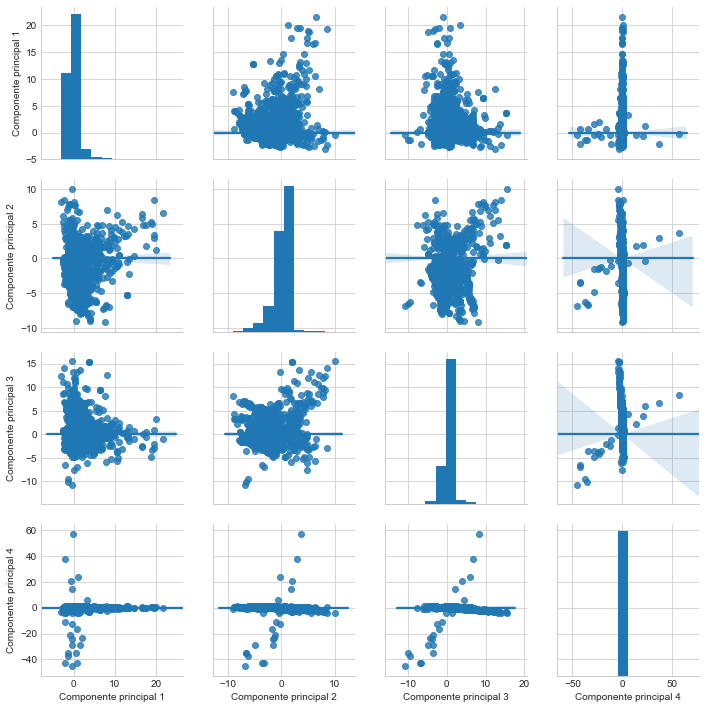

In [26]:
b = sns.pairplot(PCA_C, vars=["Componente principal 1","Componente principal 2","Componente principal 3","Componente principal 4"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables

In [27]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo
PCA_C.to_excel("PCA_CAPACIDADES.xlsx")